In [9]:
using AutomotiveDrivingModels
using AutoViz
using AutomotivePOMDPs
using AutomotiveSensors

using Parameters
using Reel
using StaticArrays
using GridInterpolations 
using Distributions


using POMDPs
using POMDPToolbox
using QMDP
using JLD


In [10]:
include("../src/pedestrian_crossing/pomdp_types.jl")
include("../src/pedestrian_crossing/spaces.jl")
include("../src/pedestrian_crossing/transition.jl")
include("../src/pedestrian_crossing/observation.jl")
include("../src/pedestrian_crossing/belief.jl")
include("../src/pedestrian_crossing/policy.jl")
include("../src/pedestrian_crossing/frenet_pedestrian_pomdp.jl")
include("../src/pedestrian_crossing/helpers.jl")


animate_record (generic function with 2 methods)

In [11]:
pomdp = SingleOCFPOMDP()

params = CrosswalkParams()
params.obstacles_visible = true

obstacle_1 = ConvexPolygon([VecE2(34, -1.5), VecE2(34, -4.5), VecE2(46.5, -4.5), VecE2(46.5, -1.5)],4)
obstacle_2 = ConvexPolygon([VecE2(34, +4.5), VecE2(34, +7.5), VecE2(46.5, +7.5), VecE2(46.5, +4.5)],4)
params.obstacles = [obstacle_1, obstacle_2]

env = CrosswalkEnv(params)
pomdp.env = env

AutomotivePOMDPs.CrosswalkEnv(Roadway, AutomotiveDrivingModels.Lane(LaneTag(2, 1), AutomotiveDrivingModels.CurvePt[CurvePt({50.000, -10.000, 1.571}, 0.000, 0.000, NaN), CurvePt({50.000, 10.000, 1.571}, 20.000, 0.000, NaN)], 6.0, AutomotiveDrivingModels.SpeedLimit(-Inf, Inf), AutomotiveDrivingModels.LaneBoundary(:unknown, :unknown), AutomotiveDrivingModels.LaneBoundary(:unknown, :unknown), AutomotiveDrivingModels.LaneConnection[], AutomotiveDrivingModels.LaneConnection[]), AutomotiveDrivingModels.ConvexPolygon[ConvexPolygon: len 4 (max 4 pts)
	VecE2(34.000, -1.500)
	VecE2(34.000, -4.500)
	VecE2(46.500, -4.500)
	VecE2(46.500, -1.500)
, ConvexPolygon: len 4 (max 4 pts)
	VecE2(34.000, 4.500)
	VecE2(34.000, 7.500)
	VecE2(46.500, 7.500)
	VecE2(46.500, 4.500)
], AutomotivePOMDPs.CrosswalkParams
  n_lanes: Int64 2
  roadway_length: Float64 100.0
  lane_width: Float64 3.0
  crosswalk_length: Float64 20.0
  crosswalk_width: Float64 6.0
  start_pos: Float64 5.0
  end_pos: Float64 62.0
  speed_lim

In [4]:
# Test state space
state_space = states(pomdp)
n_states(pomdp)
x = state_space[state_index(pomdp,SingleOCFState(0.0, 0.0, 49.0, -5.0, 1.57, 1.5) )]
println(x)

cnt = 0
for (index, s) in enumerate(pomdp.state_space)
    idx = state_index(pomdp,s)
    if (idx != index)
        println("error")
        cnt = cnt + 1
    end
end
println(cnt)
println(n_states(pomdp))

SingleOCFState(0.0, 0.0, 48.0, -5.0, 1.57, 1.5)
0
107251


In [5]:
# Test action space
action_space = actions(pomdp)
n_actions(pomdp)
x = action_space[action_index(pomdp,SingleOCFAction(-4.0, 0.0) )]
println(x)

cnt = 0
for (index, a) in enumerate(pomdp.action_space)
    idx = action_index(pomdp,a)
    if (idx != index)
        println("error")
        cnt = cnt + 1
    end
end
println(cnt)

SingleOCFAction(-4.0, 0.0)
0


In [14]:
# Test transition


state = SingleOCFState(-1.0, 0.0, -1.0, -5.0, 0.785, 0.0)
action = SingleOCFAction(0.0, 0.0)
state = states(pomdp)
tic()
s = get_state_absent(pomdp, 1., 16.)
x = transition(pomdp,s,action,1.0)
toc()
println(s)


LoadError: [91mBoundsError: attempt to access 5-element Array{Float64,1} at index [0][39m

In [452]:
# Test observation space

observation_space = observations(pomdp)
n_observations(pomdp)
idx = obs_index(pomdp,SingleOCFObs(0.0, 0.0, 47.0, -5.0, 1.57, 1.5))
x = observation_space[idx]
println(x)


action = SingleOCFAction(0.0, 0.0)
tic()
obs = observation(pomdp, action, SingleOCFObs(0.0, 0.0, 49.0, -5.0, 1.57, 0.5))
toc()
println(obs)


SingleOCFState(0.0, 0.0, 46.916666666666664, -5.0, 1.57, 1.5)
elapsed time: 0.107883441 seconds
FullNormal(
dim: 4
μ: [-10.0, -10.0, 0.0, 0.0]
Σ: [0.01 0.0 0.0 0.0; 0.0 0.01 0.0 0.0; 0.0 0.0 0.01 0.0; 0.0 0.0 0.0 0.01]
)



In [453]:
# Test collision checker
collision_checker(pomdp,SingleOCFState(0.0,0.0,1.0,0.0,0.0,0.0))

true

In [454]:
# Test isterminal
isterminal(pomdp, SingleOCFState(0.0,50.0,10.0,0.0,0.0,0.0))

false

In [455]:
# Simulate
s0 = SingleOCFState(0.0, 0.0, 49.0, -5.0, 1.57, 0.5)

sim(pomdp, s0, initial_obs=s0, max_steps=10) do s
    println("state is: $s")
    a = SingleOCFAction(1.0, 0.0)
    println("moving $a")
    return a
end;


state is: SingleOCFState(0.0, 0.0, 49.0, -5.0, 1.57, 0.5)
moving SingleOCFAction(1.0, 0.0)


LoadError: [91mMethodError: Cannot `convert` an object of type Array{Float64,1} to an object of type SingleOCFState
This may have arisen from a call to the constructor SingleOCFState(...),
since type constructors fall back to convert methods.[39m

In [1]:
# Simulate to prefer
#=
    ego_y::Float64
    ego_v::Float64    
    ped_s::Float64
    ped_T::Float64
    ped_theta::Float64
    ped_v::Float64
=#

hr = HistoryRecorder(max_steps = 10)
policy = RandomPolicy(pomdp)


s0 = SingleOCFState(0.0, 0.0, 49.0, -5.0, 1.57, 0.0)
h = simulate(hr, pomdp, policy, updater(policy), nothing, s0)
h.state_hist

LoadError: [91mUndefVarError: HistoryRecorder not defined[39m

In [459]:

solver = QMDPSolver(max_iterations=50, tolerance=1e-3) 
@requirements_info solver pomdp
# run the solver
qmdp_policy = solve(solver, pomdp, verbose=true)
JLD.save("policy.jld", "policy", qmdp_policy)



INFO: POMDPs.jl requirements for solve(::QMDPSolver, ::POMDPs.POMDP) and dependencies. ([✔] = implemented correctly; [X] = missing)

For solve(::QMDPSolver, ::POMDPs.POMDP):
  [No additional requirements]
For solve(::ValueIterationSolver, ::Union{POMDPs.MDP,POMDPs.POMDP}) (in solve(::QMDPSolver, ::POMDPs.POMDP)):
  [✔] discount(::SingleOCFPOMDP)
  [✔] n_states(::SingleOCFPOMDP)
  [✔] n_actions(::SingleOCFPOMDP)
  [✔] transition(::SingleOCFPOMDP, ::SingleOCFState, ::SingleOCFAction)
  [✔] reward(::SingleOCFPOMDP, ::SingleOCFState, ::SingleOCFAction, ::SingleOCFState)
  [✔] state_index(::SingleOCFPOMDP, ::SingleOCFState)
  [✔] action_index(::SingleOCFPOMDP, ::SingleOCFAction)
  [✔] actions(::SingleOCFPOMDP, ::SingleOCFState)
  [✔] iterator(::Array)
  [✔] iterator(::Array)
  [✔] iterator(::SparseCat)
  [✔] pdf(::SparseCat, ::SingleOCFState)
For ordered_states(::Union{POMDPs.MDP,POMDPs.POMDP}) (in solve(::ValueIterationSolver, ::Union{POMDPs.MDP,POMDPs.POMDP})):
  [✔] states(::SingleOCFPO

10-Okt 00:31:30:WARNING:root:Keyword args for solve(::QMDPSolver, ::POMDP) are no longer supported. For verbose output, use the verbose option in the ValueIterationSolver


LoadError: [91mInterruptException:[39m

In [7]:
qmdp_policy = load("policy.jld")["policy"];


up = SingleOCFUpdater(pomdp)
b0 = initial_state_distribution(pomdp)
tic()
b_ego = initial_state_distribution_ego_known(pomdp, -1.0, 0.0)
toc()

elapsed time: 0.049814457 seconds


0.049814457

In [48]:
using ProfileView
Profile.clear()

act = SingleOCFAction(0.0, 0.0)

#tic()
#obs = observation(pomdp,action,observ)
#toc()
#println(obs)


# Test transition
#=
    ego_y::Float64
    ego_v::Float64    
    ped_s::Float64
    ped_T::Float64
    ped_theta::Float64
    ped_v::Float64
=#
state = SingleOCFState(-1.0, 0.0, -1.0, -5.0, 0.785, 0.0)
act = SingleOCFAction(0.0, 0.0)

absent_state = pomdp.state_space[end]
tic()
@time ta = transition(pomdp,absent_state,act,1.0)
toc()
println(length(ta))

#ts = transition(pomdp,state,action,1.0)


  0.000709 seconds (23 allocations: 167.047 KiB)
elapsed time: 0.008676765 seconds
1875


In [61]:
up = SingleOCFUpdater(pomdp)

pomdp.absent = false
pomdp.ego_vehicle = Vehicle(VehicleState(VecSE2(20.0, 0.0, 0.), 0.0), VehicleDef(), 1)
obstacle_1 = ConvexPolygon([VecE2(15, -1.5), VecE2(15, -4.5), VecE2(21.5, -4.5), VecE2(21.5, -1.5)],4)
obstacle_2 = ConvexPolygon([VecE2(15, +4.5), VecE2(15, +7.5), VecE2(21.5, +7.5), VecE2(21.5, +4.5)],4)
pomdp.obstacles = [obstacle_1, obstacle_2]


ego_y = -1.0
ego_v = 0.0


observ = SingleOCFObs( ego_y, ego_v, 11.5, -3.0, 0.785, 0.0)


b_ego=initial_state_distribution_ego_known(pomdp, ego_y_to_state_pace(pomdp,ego_y), ego_v_to_state_pace(pomdp,ego_v))
act = SingleOCFAction(0.0, 0.0)

@time b = update(up,b_ego,act,observ)
println(b)



@time b2 = update(up,b,act,observ)
#println(b2)


@time b3 = update(up,b2,act,observ)
#println(b3)


@time b4 = update(up,b3,act,observ)
println(b4)

#y = pdf(x,SVector(-1.0, 0.0, -1.0, -5.0, 0.785, 0.0))
#println(y)


observation cont: SingleOCFState(-1.0, 0.0, 11.5, -3.0, 0.785, 0.0)
observation discrete: SingleOCFState[SingleOCFState(-1.0, 0.0, 11.5, -3.0, 0.785, 0.0)]
obs_int_id: [3921]
cont_weights: [1.0]
1000
2000
3000
4000
5000
6000
 10.226143 seconds (25.75 M allocations: 3.210 GiB, 16.94% gc time)
POMDPToolbox.SparseCat{Array{SingleOCFState,1},Array{Float64,1}}(SingleOCFState[SingleOCFState(-1.0, 0.0, 11.5, -4.0, 0.785, 0.0), SingleOCFState(-1.0, 0.0, 11.5, -3.0, 0.785, 0.0), SingleOCFState(-1.0, 0.0, 11.5, -2.0, 0.785, 0.0), SingleOCFState(-1.0, 0.0, 11.5, -3.0, 1.1775, 0.0), SingleOCFState(-1.0, 0.0, 11.5, -3.0, 1.57, 0.0), SingleOCFState(-1.0, 0.0, 11.5, -3.0, 0.785, 0.5), SingleOCFState(-1.0, 0.0, 11.5, -3.0, 1.1775, 0.5), SingleOCFState(-1.0, 0.0, 11.5, -3.0, 1.57, 0.5), SingleOCFState(-1.0, 0.0, 11.5, -3.0, 0.785, 1.0), SingleOCFState(-1.0, 0.0, 11.5, -3.0, 1.1775, 1.0)], [0.00236831, 0.351488, 0.00236831, 0.215925, 0.0267873, 0.258915, 0.115239, 0.014764, 0.00881801, 0.00332646])
obse

In [56]:

#fieldnames(qmdp_policy)
#act = action( qmdp_policy, b4) # policy
Profile.clear()


In [57]:
up = SingleOCFUpdater(pomdp)


ego_y = -1.0
ego_v = 0.0

observ = SingleOCFObs( ego_y, ego_v, 11.5, -3.0, 0.785, 0.0)

b_ego=initial_state_distribution_ego_known(pomdp, ego_y_to_state_pace(pomdp,ego_y), ego_v_to_state_pace(pomdp,ego_v))
act = SingleOCFAction(0.0, 0.0)

@profile b = update(up,b_ego,act,observ)
println(length(b))


observation cont: SingleOCFState(-1.0, 0.0, 11.5, -3.0, 0.785, 0.0)
observation discrete: SingleOCFState[SingleOCFState(-1.0, 0.0, 11.5, -3.0, 0.785, 0.0)]
obs_int_id: [3921]
cont_weights: [1.0]
-1.0
1000
2000
3000
4000
5000
6000
14


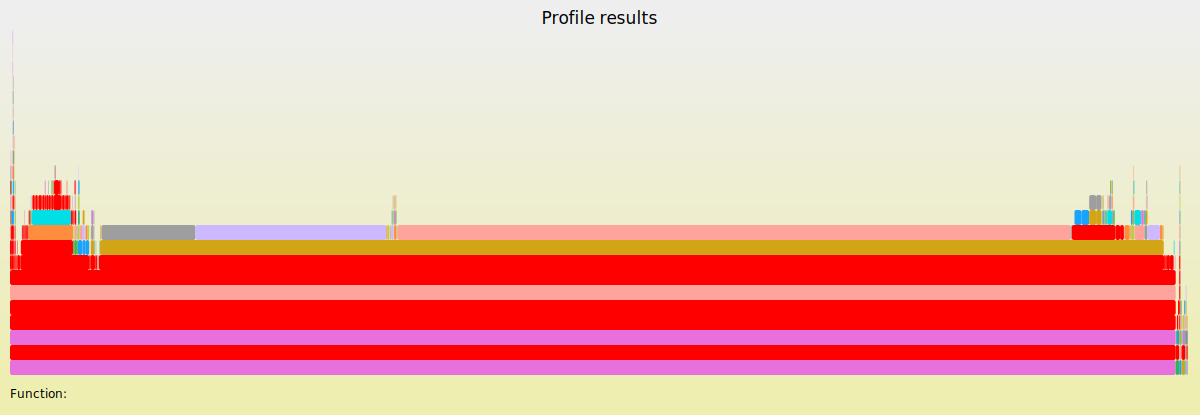

In [58]:
ProfileView.view()
Profile.clear()


In [ ]:
sp_ego_y = 0.0
sp_ego_v = 0.0
sp_ped_s = 0.0
sp_ped_T = 0.0
sp_ped_theta = 0.0
sp_ped_v = 0.0
@time state_vector = SVector{6, Float64}(sp_ego_y, sp_ego_v, sp_ped_s, sp_ped_T, sp_ped_theta, sp_ped_v)
@time state_vector = SVector(sp_ego_y, sp_ego_v, sp_ped_s, sp_ped_T, sp_ped_theta, sp_ped_v)


In [ ]:
using ProfileView
tic()
bp0 =update(up,b0,act,observ)
toc()

tic()
bpego =update(up,bego,act,observ)
toc()



In [ ]:
Profile.clear()

In [15]:
ProfileView.view()

05-Okt 10:38:47:WARNING:root:There were no samples collected. Run your program longer (perhaps by
running it multiple times), or adjust the delay between samples with
Profile.init().


LoadError: [91mNothing to view[39m

In [ ]:
b0u = uniform_belief(pomdp)
updater2 = DiscreteUpdater(pomdp)
observ = SingleOCFObs(-1.0, 0.0, -1.0, -5.0, 0.785, 0.0)
tic()
b1 =update(updater2,b0u,SingleOCFAction(0.0, 0.0),observ)
toc()

In [ ]:
b2 =update(updater2,b1,SingleOCFAction(0.0, 0.0),observ)


In [17]:
@time a = POMDPs.action(qmdp_policy,b2)
println(a)

  0.000761 seconds (5.89 k allocations: 220.031 KiB)
SingleOCFAction(1.0, 1.0)


In [393]:
obstacle_1 = ConvexPolygon([VecE2(15, -1.5), VecE2(15, -4.5), VecE2(21.5, -4.5), VecE2(21.5, -1.5)],4)
obstacle_2 = ConvexPolygon([VecE2(15, +4.5), VecE2(15, +7.5), VecE2(21.5, +7.5), VecE2(21.5, +4.5)],4)
pomdp.env.obstacles = [obstacle_1, obstacle_2]

sp = SingleOCFState(0.0, 0.0, 22.0, -3.0, 0.0, 0.0)
AutomotivePOMDPs.is_observable_fixed(sp.ped_s, sp.ped_T, VehicleState(VecSE2(0., 0., 0.), 0.0), pomdp.env)

false

In [19]:
b4

POMDPToolbox.SparseCat{Array{SingleOCFState,1},Array{Float64,1}}(SingleOCFState[SingleOCFState(-1.0, 0.0, 5.25, -2.0, 0.785, 1.0), SingleOCFState(-1.0, 0.0, 7.33333, -2.0, 0.785, 1.0), SingleOCFState(-1.0, 0.0, 5.25, -1.0, 0.785, 1.0), SingleOCFState(-1.0, 0.0, 7.33333, -1.0, 0.785, 1.0)], [0.897075, 0.0898088, 0.00860269, 0.0045138])

In [40]:
pomdp.EGO_V_RANGE

14-element Array{Float64,1}:
  0.0    
  1.07692
  2.15385
  3.23077
  4.30769
  5.38462
  6.46154
  7.53846
  8.61538
  9.69231
 10.7692 
 11.8462 
 12.9231 
 14.0    

In [35]:
pomdp.PED_V_RANGE

5-element Array{Float64,1}:
 0.0
 0.5
 1.0
 1.5
 2.0

In [23]:
length(b_ego)

6876

In [419]:
include("../src/pedestrian_crossing/pomdp_types.jl")
include("../src/pedestrian_crossing/spaces.jl")
include("../src/pedestrian_crossing/transition.jl")
include("../src/pedestrian_crossing/observation.jl")
include("../src/pedestrian_crossing/belief.jl")

obstacle_1 = ConvexPolygon([VecE2(15, -1.5), VecE2(15, -4.5), VecE2(21.5, -4.5), VecE2(21.5, -1.5)],4)
obstacle_2 = ConvexPolygon([VecE2(15, +4.5), VecE2(15, +7.5), VecE2(21.5, +7.5), VecE2(21.5, +4.5)],4)
pomdp.env.obstacles = [obstacle_1, obstacle_2]

sp = SingleOCFState(-1.0, 0.0, 22.0, -4.0, 0.0, 0.0)
observ = SingleOCFObs(-1.0, 0.0, -20.0, -5.0, 0.785, 0.0)
sp = pomdp.state_space[end]



SingleOCFState(0.0, 0.0, -10.0, -10.0, 0.0, 0.0)

x: 1.5 y: -1.5 right_side: true
x: 1.5 y: 4.5 right_side: false


In [2]:

@time for i=1:10000; observation_weight(pomdp, sp, observ); end

LoadError: [91mUndefVarError: observation_weight not defined[39m

ERROR (unhandled task failure): InterruptException:
Stacktrace:
 [1] process_events at ./libuv.jl:82 [inlined]
 [2] wait() at ./event.jl:216
 [3] wait(::Condition) at ./event.jl:27
 [4] stream_wait(::Timer, ::Condition, ::Vararg{Condition,N} where N) at ./stream.jl:42
 [5] wait(::Timer) at ./event.jl:357
 [6] (::Base.##302#303{IJulia.#send_stdout,Timer})() at ./event.jl:430


In [493]:
sp = SingleOCFState(0.0, 0.0, 24.0, 3.0, 0.0, 0.0)
observ = pomdp.state_space[end]
pomdp.env.obstacles = [obstacle_1, obstacle_2]
observation_weight(pomdp, sp, observ)

 #AutomotiveSensors.occlusion_checker(VehicleState(VecSE2(0., 0., 0.), 0.0), VehicleState(VecSE2(24, 3, 0.), 0.0), pomdp.env.obstacles)
   

1.0

In [ ]:
mdp = UnderlyingMDP(pomdp)
struct OCMDPPolicy <: Policy
    policy::AlphaVectorPolicy
    pomdp::SingleOCFPOMDP
end

function POMDPs.action(policy::OCMDPPolicy, s::SingleOCFState)
    si = state_index(policy.pomdp, s)
    ai = indmax(policy.policy.alphas[si])
    a = actions(policy.pomdp, ai)
    return a
end

hr = HistoryRecorder()

s0 = 
hist = simulate(hr, mdp, policy, s0)

In [ ]:
act = actions(pomdp)
a = act[1]
trans_dict = Dict()
for s in states(pomdp)
 #  for a in actions(pomdp)
       d = transition(pomdp, s, a)
       trans_dict[(s, a)] = d
 #  end
end

In [11]:
length(trans_dict)

107251